# Improving the models

Agenda:

We will learn about

1.   Optimizers
2.   How Overfitting/Underfitting affects the performance
3.   Strategies how to treat overfitting/underfitting


---

## Optimizers

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


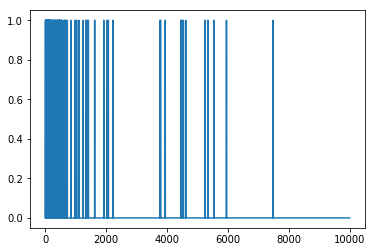

In [3]:
plt.plot(train_data[0])

In [4]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

W0802 12:48:38.505109 139626599835520 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0802 12:48:38.629070 139626599835520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.4682 - acc: 0.8094 - binary_crossentropy: 0.4682 - val_loss: 0.3268 - val_acc: 0.8784 - val_binary_crossentropy: 0.3268
Epoch 2/20
25000/25000 - 3s - loss: 0.2436 - acc: 0.9122 - binary_crossentropy: 0.2436 - val_loss: 0.2845 - val_acc: 0.8880 - val_binary_crossentropy: 0.2845
Epoch 3/20
25000/25000 - 3s - loss: 0.1811 - acc: 0.9363 - binary_crossentropy: 0.1811 - val_loss: 0.2918 - val_acc: 0.8835 - val_binary_crossentropy: 0.2918
Epoch 4/20
25000/25000 - 3s - loss: 0.1479 - acc: 0.9489 - binary_crossentropy: 0.1479 - val_loss: 0.3211 - val_acc: 0.8757 - val_binary_crossentropy: 0.3211
Epoch 5/20
25000/25000 - 3s - loss: 0.1223 - acc: 0.9588 - binary_crossentropy: 0.1223 - val_loss: 0.3358 - val_acc: 0.8745 - val_binary_crossentropy: 0.3358
Epoch 6/20
25000/25000 - 3s - loss: 0.1019 - acc: 0.9680 - binary_crossentropy: 0.1019 - val_loss: 0.3644 - val_acc: 0.8713 - val_binary_crossentropy: 0.3644
Ep

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6034 - acc: 0.7328 - binary_crossentropy: 0.6034 - val_loss: 0.5167 - val_acc: 0.8509 - val_binary_crossentropy: 0.5167
Epoch 2/20
25000/25000 - 3s - loss: 0.4245 - acc: 0.8779 - binary_crossentropy: 0.4245 - val_loss: 0.3913 - val_acc: 0.8763 - val_binary_crossentropy: 0.3913
Epoch 3/20
25000/25000 - 3s - loss: 0.3136 - acc: 0.9039 - binary_crossentropy: 0.3136 - val_loss: 0.3301 - val_acc: 0.8829 - val_binary_crossentropy: 0.3301
Epoch 4/20
25000/25000 - 3s - loss: 0.2517 - acc: 0.9202 - binary_crossentropy: 0.2517 - val_loss: 0.3007 - val_acc: 0.8863 - val_binary_crossentropy: 0.3007
Epoch 5/20
25000/25000 - 3s - loss: 0.2129 - acc: 0.9318 - binary_crossentropy: 0.2129 - val_loss: 0.2884 - val_acc: 0.8867 - val_binary_crossentropy: 0.2884
Epoch 6/20
25000/25000 - 3s - loss: 0.1866 - acc: 0.9393 - binary_crossentropy: 0.1866 - val_loss: 0.2848 - val_acc: 0.8882 - val_binary_crossentropy: 0.2848
Ep

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 16s - loss: 0.3509 - acc: 0.8450 - binary_crossentropy: 0.3509 - val_loss: 0.3065 - val_acc: 0.8735 - val_binary_crossentropy: 0.3065
Epoch 2/20
25000/25000 - 16s - loss: 0.1454 - acc: 0.9475 - binary_crossentropy: 0.1454 - val_loss: 0.3250 - val_acc: 0.8756 - val_binary_crossentropy: 0.3250
Epoch 3/20
25000/25000 - 16s - loss: 0.0466 - acc: 0.9867 - binary_crossentropy: 0.0466 - val_loss: 0.4368 - val_acc: 0.8689 - val_binary_crossentropy: 0.4368
Epoch 4/20
25000/25000 - 16s - loss: 0.0071 - acc: 0.9988 - binary_crossentropy: 0.0071 - val_loss: 0.5743 - val_acc: 0.8684 - val_binary_crossentropy: 0.5743
Epoch 5/20
25000/25000 - 16s - loss: 8.2481e-04 - acc: 1.0000 - binary_crossentropy: 8.2481e-04 - val_loss: 0.6714 - val_acc: 0.8702 - val_binary_crossentropy: 0.6714
Epoch 6/20
25000/25000 - 16s - loss: 2.3707e-04 - acc: 1.0000 - binary_crossentropy: 2.3707e-04 - val_loss: 0.7162 - val_acc: 0.8717 - val_binary_c

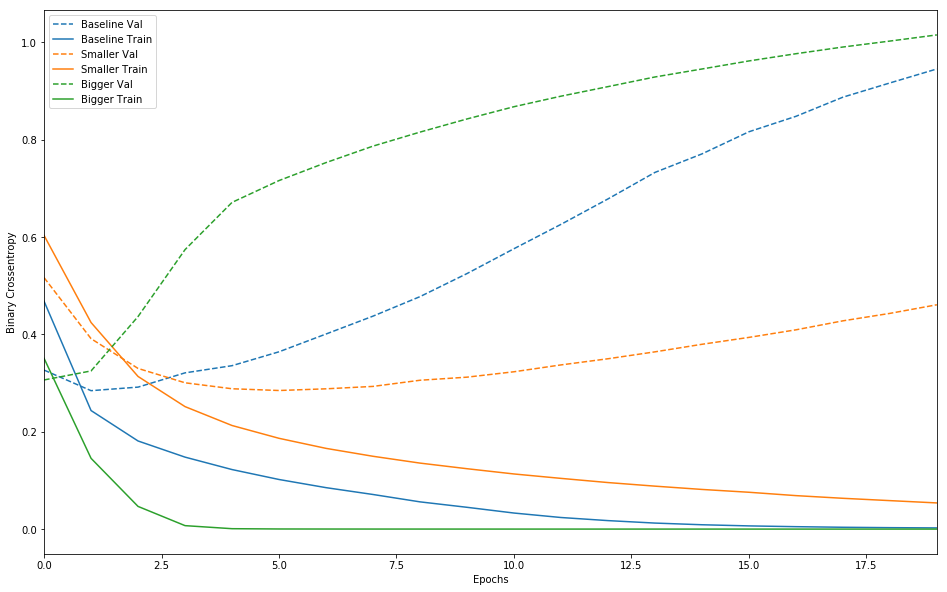

In [10]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

Notice that the larger network begins overfitting almost right away, after just one epoch, and overfits much more severely. The more capacity the network has, the quicker it will be able to model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large difference between the training and validation loss).

## Strategies

### Add Weight Regularization



In [11]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5626 - acc: 0.7672 - binary_crossentropy: 0.5227 - val_loss: 0.4210 - val_acc: 0.8716 - val_binary_crossentropy: 0.3811
Epoch 2/20
25000/25000 - 3s - loss: 0.3323 - acc: 0.9050 - binary_crossentropy: 0.2876 - val_loss: 0.3430 - val_acc: 0.8877 - val_binary_crossentropy: 0.2945
Epoch 3/20
25000/25000 - 3s - loss: 0.2639 - acc: 0.9274 - binary_crossentropy: 0.2125 - val_loss: 0.3380 - val_acc: 0.8859 - val_binary_crossentropy: 0.2846
Epoch 4/20
25000/25000 - 3s - loss: 0.2355 - acc: 0.9389 - binary_crossentropy: 0.1801 - val_loss: 0.3531 - val_acc: 0.8812 - val_binary_crossentropy: 0.2964
Epoch 5/20
25000/25000 - 3s - loss: 0.2172 - acc: 0.9468 - binary_crossentropy: 0.1593 - val_loss: 0.3643 - val_acc: 0.8791 - val_binary_crossentropy: 0.3054
Epoch 6/20
25000/25000 - 3s - loss: 0.2037 - acc: 0.9525 - binary_crossentropy: 0.1437 - val_loss: 0.3756 - val_acc: 0.8760 - val_binary_crossentropy: 0.3151
Ep

l2(0.001) means that every coefficient in the weight matrix of the layer will add 0.001x weight_coefficient_value xx 2 to the total loss of the network. Note that because this penalty is only added at training time, the loss for this network will be much higher at training than at test time.

Here's the impact of our L2 regularization penalty:

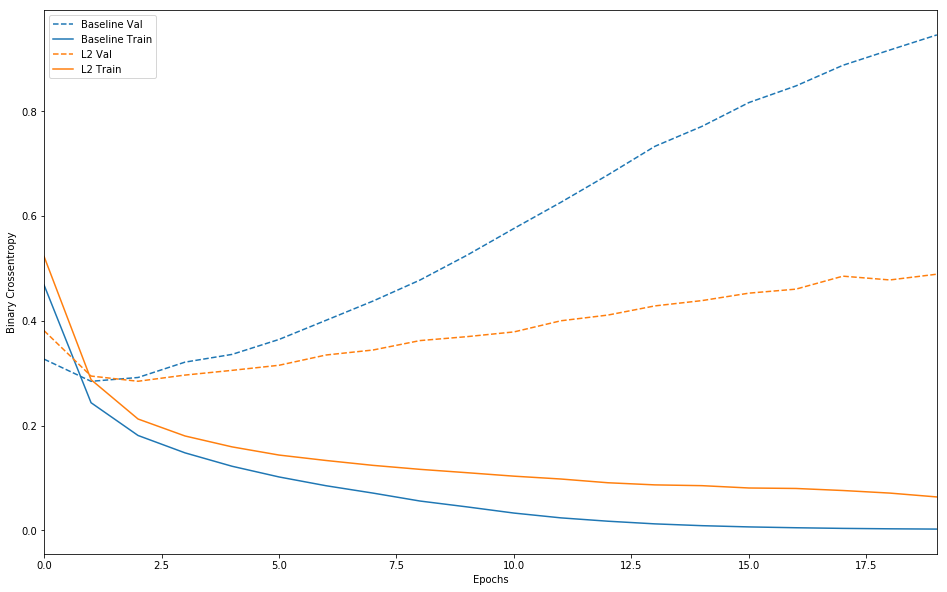

In [12]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

As you can see, the L2 regularized model has become much more resistant to overfitting than the baseline model, even though both models have the same number of parameters.

### Add dropout

In [13]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6188 - acc: 0.6561 - binary_crossentropy: 0.6188 - val_loss: 0.4984 - val_acc: 0.8578 - val_binary_crossentropy: 0.4984
Epoch 2/20
25000/25000 - 3s - loss: 0.4741 - acc: 0.8053 - binary_crossentropy: 0.4741 - val_loss: 0.3630 - val_acc: 0.8822 - val_binary_crossentropy: 0.3630
Epoch 3/20
25000/25000 - 3s - loss: 0.3848 - acc: 0.8599 - binary_crossentropy: 0.3848 - val_loss: 0.3088 - val_acc: 0.8869 - val_binary_crossentropy: 0.3088
Epoch 4/20
25000/25000 - 3s - loss: 0.3165 - acc: 0.8905 - binary_crossentropy: 0.3165 - val_loss: 0.2895 - val_acc: 0.8891 - val_binary_crossentropy: 0.2895
Epoch 5/20
25000/25000 - 3s - loss: 0.2716 - acc: 0.9100 - binary_crossentropy: 0.2716 - val_loss: 0.2790 - val_acc: 0.8900 - val_binary_crossentropy: 0.2790
Epoch 6/20
25000/25000 - 3s - loss: 0.2393 - acc: 0.9213 - binary_crossentropy: 0.2393 - val_loss: 0.2949 - val_acc: 0.8860 - val_binary_crossentropy: 0.2949
Ep

In [0]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

Adding dropout is a clear improvement over the baseline model.

To recap: here the most common ways to prevent overfitting in neural networks:

* Get more training data.
* Reduce the capacity of the network.
* Add weight regularization.
* Add dropout.

And two important approaches not covered in this guide are data-augmentation and batch normalization.